### Generate Images

In [65]:
import pandas as pd
from matplotlib import pyplot as plt
import math
from itertools import cycle, islice
import numpy as np
  
def get_visualization_all(path_general=".",data_sizes = ["Scale3","Scale6","Scale9"], folder=""):
    dfs = []
    for i, data_size in enumerate(data_sizes):
        stats_path = path_general+ "/{folder}_{size}_KNAF2D.csv".format(folder=folder, size=data_size)
        df = pd.read_csv(stats_path)
        df['scale'] = data_size
        dfs.append(df)

    df_final=pd.concat(dfs, ignore_index=True)

    return df_final

def create_mail_images(data_sizes = ["Scale3","Scale6","Scale9"]):
    folder_base="/Users/lauraforerocamacho/Downloads/TPCDI-Benchmark/result"
    temp_folder_img="/Users/lauraforerocamacho/Downloads/TPCDI-Benchmark/images/"

    df_all_overal = get_visualization_all(folder_base,data_sizes,"overall_stats")
    df_all_historical = get_visualization_all(folder_base,data_sizes,"historical_load")
    df_all_incremental = get_visualization_all(folder_base,data_sizes,"incremental_load")
    c = '#7eb54e'




    for k in ["create_db_time","et","rows","throughput"]:
        df_all_plt_historical =df_all_historical.pivot_table(
            index='scale', values=k).plot(kind='bar', rot=0, figsize=(15,7), title=f"Historical {k}",color = c)
        df_all_plt_historical.figure.savefig(temp_folder_img+f"historical_stats_{k}.png")

    for k in ["et","rows","throughput"]:
        df_all_plt_incremental =df_all_incremental.pivot_table(
            index='scale', values=k).plot(kind='bar', rot=0, figsize=(15,7), title=f"Incremental {k}",color = c)
        df_all_plt_incremental.figure.savefig(temp_folder_img+f"incremental_stats_{k}.png")

    df_all_historical["Type"]="Historical"
    df_all_incremental["Type"]="Incremental"

    df_all_incremental_historical =pd.concat([df_all_historical,df_all_incremental], ignore_index=True)
    for k in ["et","rows","throughput"]:
        df_all_plt_incremental_historical =df_all_incremental_historical.pivot_table(
            index='scale',columns="Type", values=k).plot(kind='bar', rot=0, figsize=(15,7), title=f"Comparison incremental and historical {k}")
        df_all_plt_incremental_historical.figure.savefig(temp_folder_img+f"incremental_historical_stats_{k}.png")

    for k in ["TPC_DI_RPS"]:
        df_all_plt_overal =df_all_overal.pivot_table(
            index='scale', values=k).plot(kind='bar', rot=0, figsize=(15,7), title=f"Overall {k}",color = c)
        df_all_plt_overal.figure.savefig(temp_folder_img+f"overall_stats_{k}.png")


    
    return []

[]

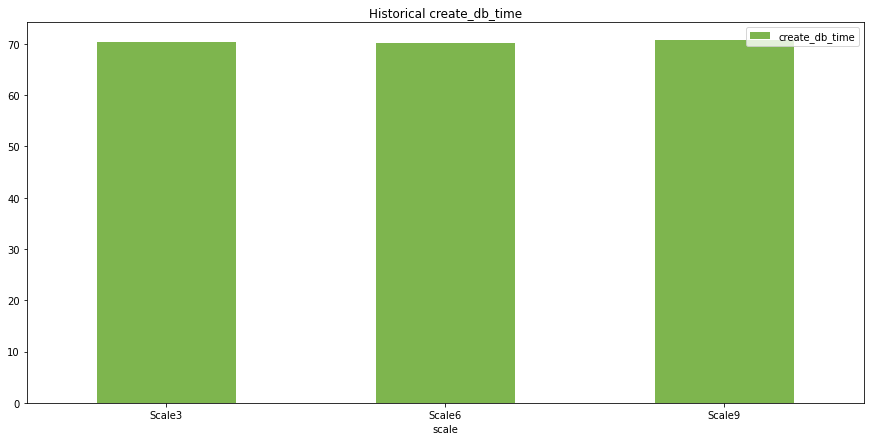

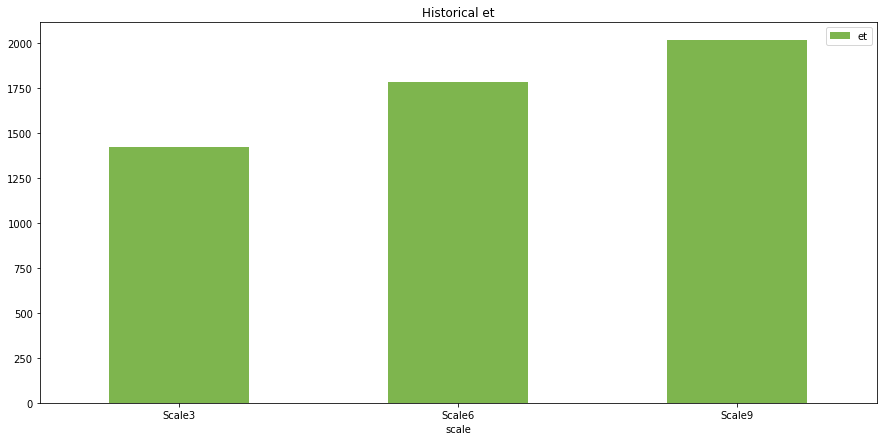

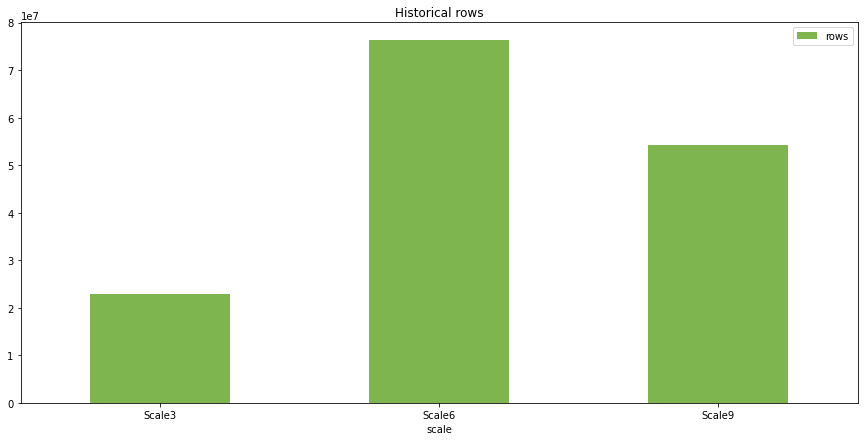

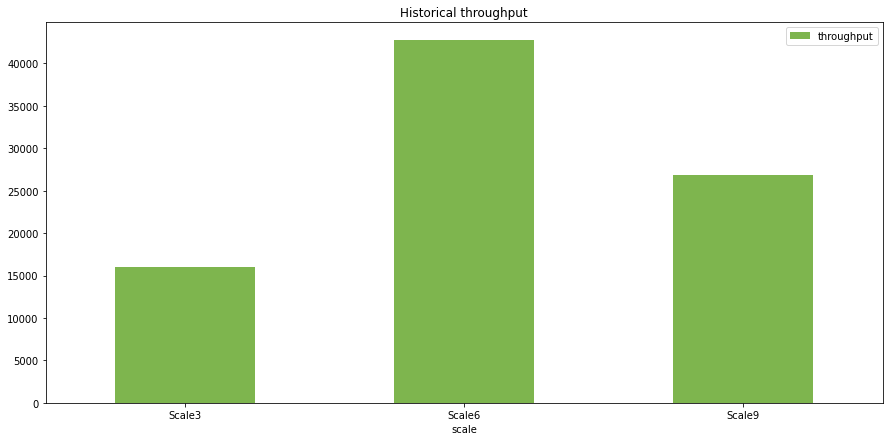

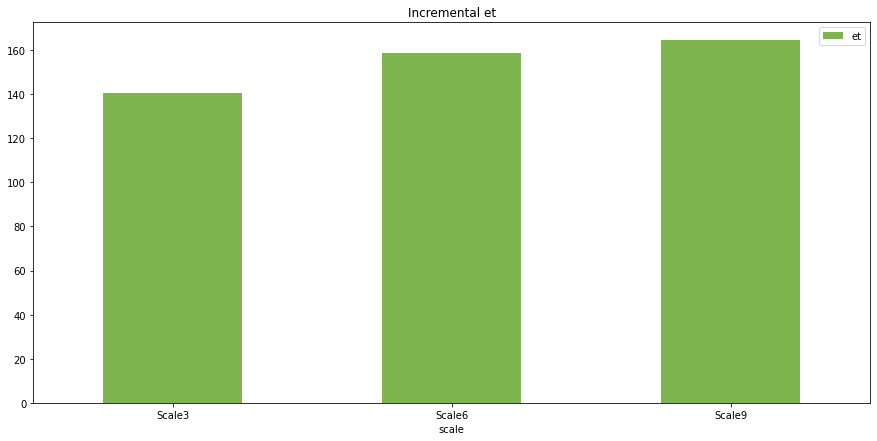

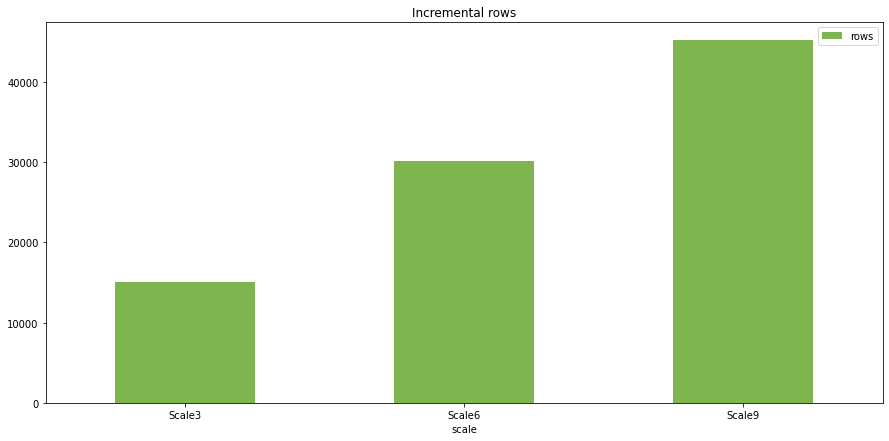

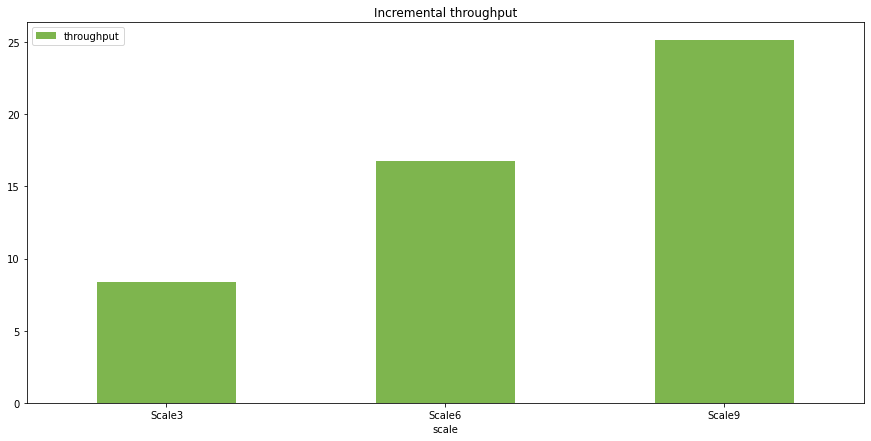

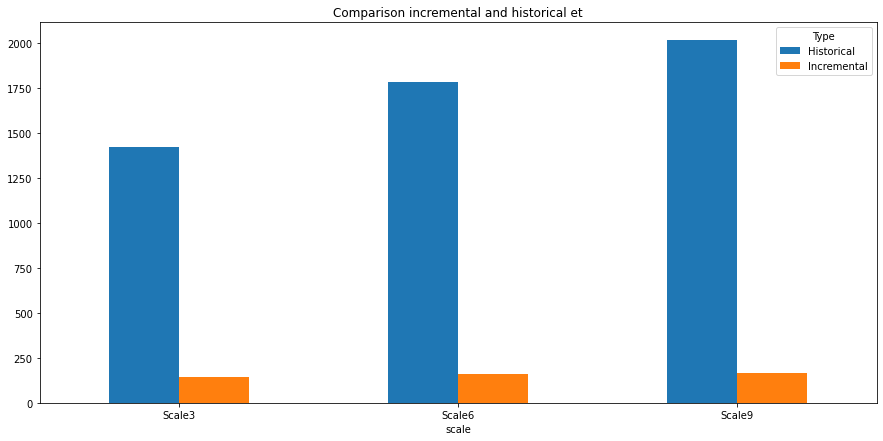

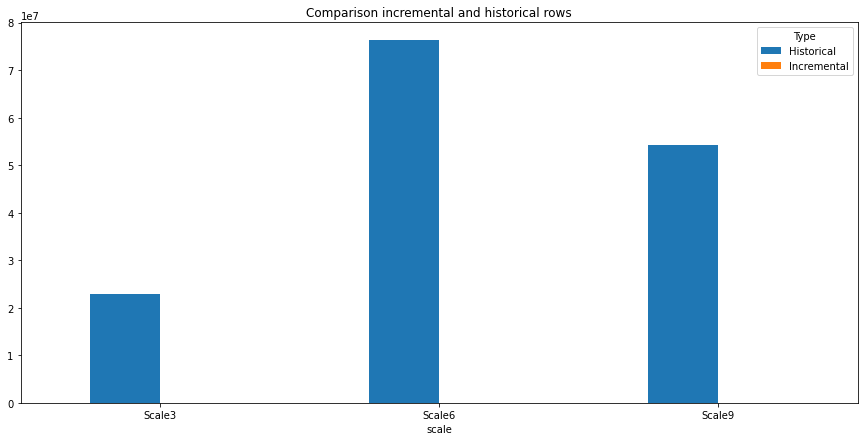

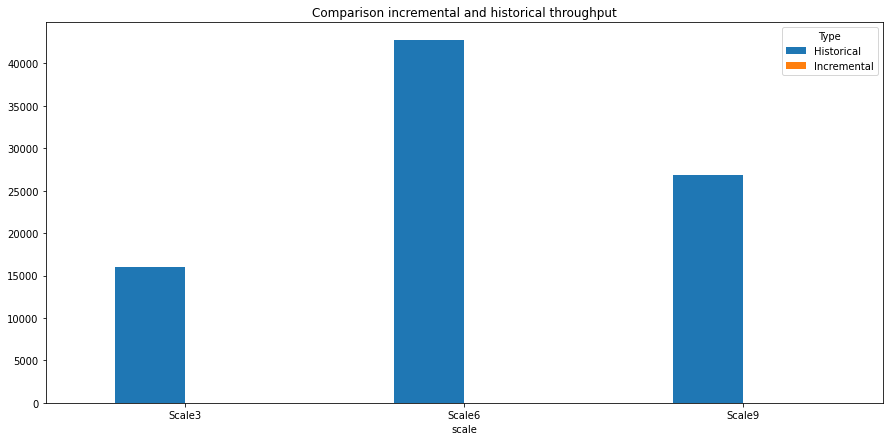

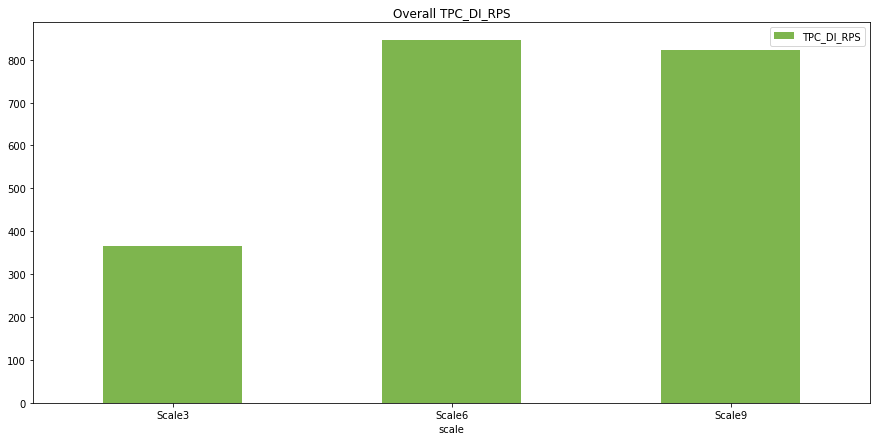

In [66]:
create_mail_images()